In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import glob
import datetime
%matplotlib inline

daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')

/home/brad/DailyLog/20190313/


In [10]:
datapath = '/home/brad/DailyLog/20190313/'
data_files = glob.glob(os.path.join(datapath, '*'))
print(data_files)

['/home/brad/DailyLog/20190313/JSpop_B1056-1-1.5-10_LvsR-familiar-original', '/home/brad/DailyLog/20190313/JSpop_B1235-1-1.0-10_LvsR-familiar-original', '/home/brad/DailyLog/20190313/JSpop_B1056-1-1.0-10_LvsR-familiar-original', '/home/brad/DailyLog/20190313/JSpop_B1235-1-1.5-10_LvsR-familiar-original']


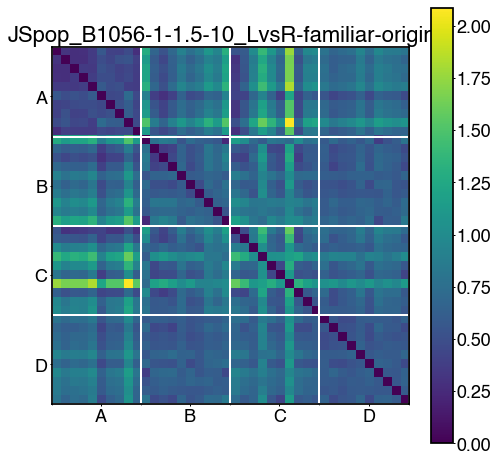

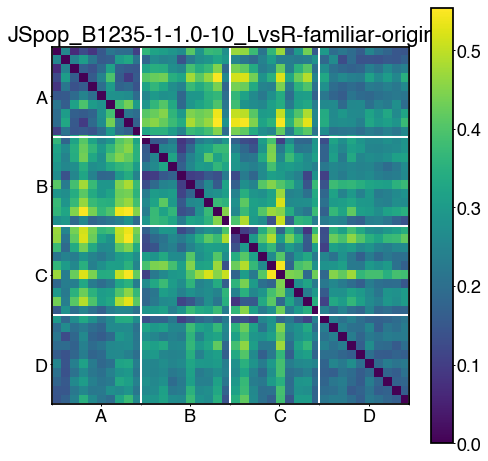

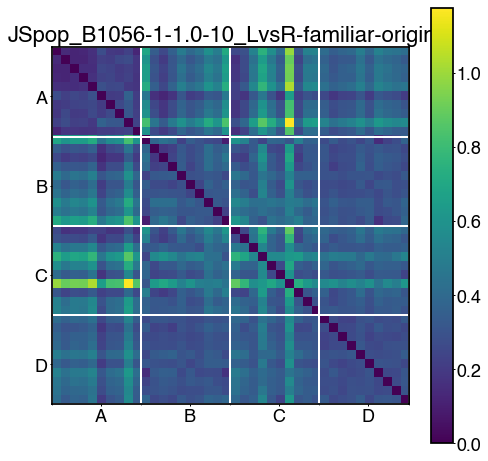

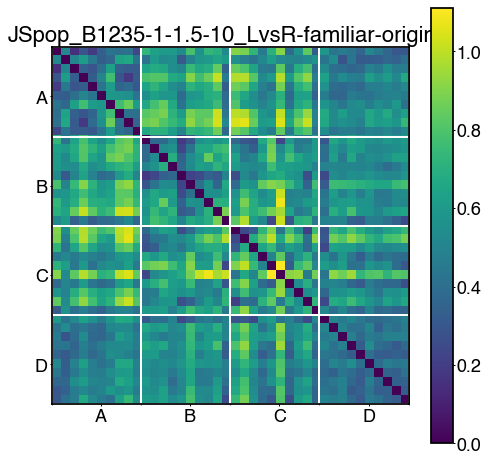

In [11]:

ticklabels = [['A', 'B', 'C', 'D'], ['E', 'F', 'G', 'H']]
for data_file in data_files:
    plot_title = os.path.split(data_file)[1]
    
    with open(data_file, 'rb') as f:
        dat = pickle.load(f)
    plt.figure(figsize=(8,8))
    ntrials = 10
    nstim = 4
    ax = plt.gca()
    dsym = dat+dat.T
    plt.imshow(dsym,  aspect='equal')
#     plt.xticks(np.arange(0,ntrials*nstim, ntrials))
#     plt.yticks(np.arange(0,ntrials*nstim, ntrials))
    ax.set_yticks(np.arange(-0.5, ntrials*nstim, ntrials), minor=True)
    ax.set_xticks(np.arange(-0.5, ntrials*nstim, ntrials), minor=True)
    ax.set_xticks(np.arange(ntrials/2, nstim*ntrials, ntrials))
    ax.set_yticks(np.arange(ntrials/2, nstim*ntrials, ntrials))
    if 'unfamiliar' in data_file:
        tl = ticklabels[1]
    else:
        tl = ticklabels[0]
    ax.set_xticklabels(tl)
    ax.set_yticklabels(tl)
#     ax.set_xlim([-0.5, 39.5])
#     ax.set_ylim([39.5, -0.5])
    
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    plt.colorbar()
    plt.title(plot_title)
    plt.savefig(os.path.join(figsavepth, '{}.pdf'.format(plot_title.replace(' ', '_'))))

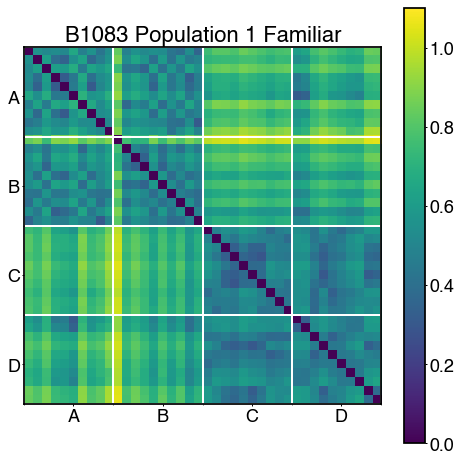

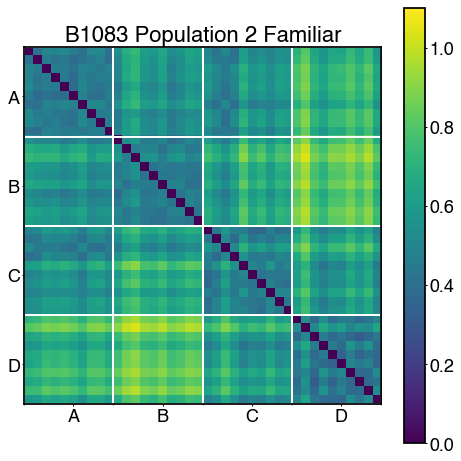

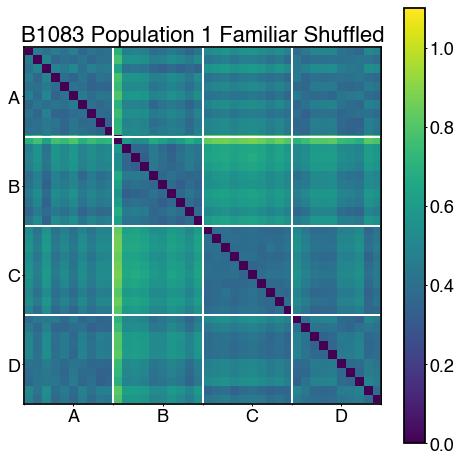

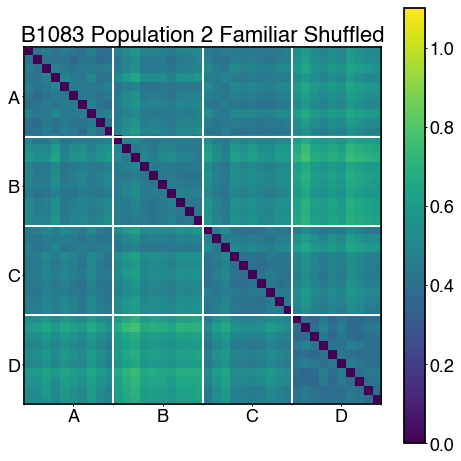

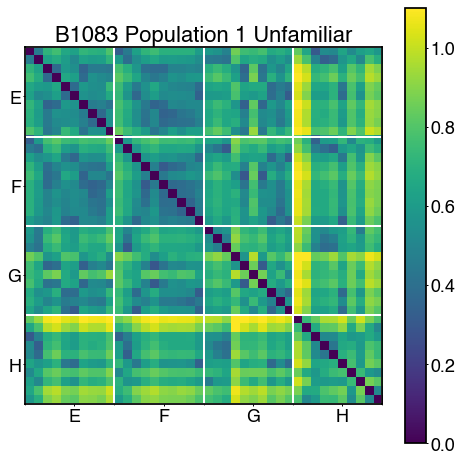

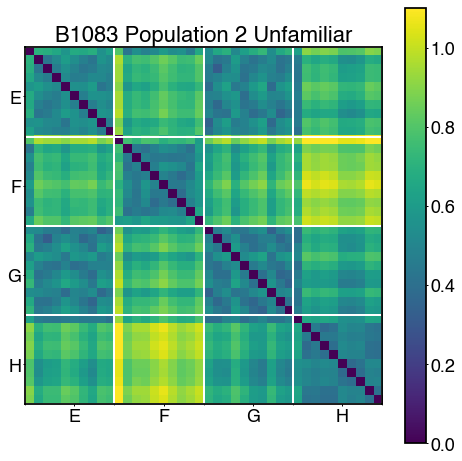

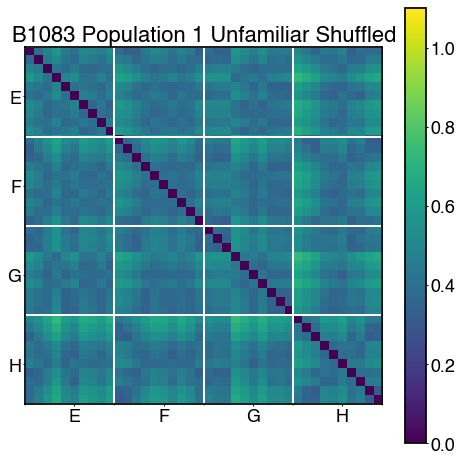

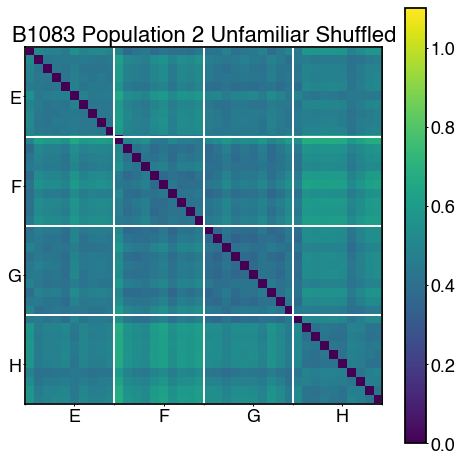

In [6]:
# Plot square root of JSD - this is a metric
ticklabels = [['A', 'B', 'C', 'D'], ['E', 'F', 'G', 'H']]
for data_file, plot_title in zip(data_files, plot_titles):
    with open(data_file, 'rb') as f:
        dat = pickle.load(f)
    plt.figure(figsize=(8,8))
    ntrials = 10
    nstim = 4
    ax = plt.gca()
    dsym = dat+dat.T
    plt.imshow(np.sqrt(dsym), vmin=0.0, vmax=1.1, aspect='equal')
#     plt.xticks(np.arange(0,ntrials*nstim, ntrials))
#     plt.yticks(np.arange(0,ntrials*nstim, ntrials))
    ax.set_yticks(np.arange(-0.5, ntrials*nstim, ntrials), minor=True)
    ax.set_xticks(np.arange(-0.5, ntrials*nstim, ntrials), minor=True)
    ax.set_xticks(np.arange(5, 40, 10))
    ax.set_yticks(np.arange(5, 40, 10))
    if 'unfamiliar' in data_file:
        tl = ticklabels[1]
    else:
        tl = ticklabels[0]
    ax.set_xticklabels(tl)
    ax.set_yticklabels(tl)
    ax.set_xlim([-0.5, 39.5])
    ax.set_ylim([39.5, -0.5])
    
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    plt.colorbar()
    plt.title(plot_title)
    plt.savefig(os.path.join(figsavepth, 'sqrt{}.pdf'.format(plot_title.replace(' ', '_'))))

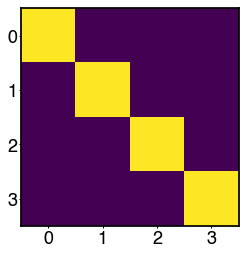

In [29]:
test = np.array([[0,1,0], [0,0, 0], [0,0,0]])
test = np.eye(4)
plt.imshow(test)

In [55]:
bird = 'B1083'
datpath = '/home/brad/tmpdata/JSpop_{}-1--1.0-10_LvsR-2-unfamiliar.pkl'.format(bird)
with open(datpath, 'rb') as f:
    dat = pickle.load(f)
    

Text(0.5,1,'B1083 Population 1 Unfamiliar')

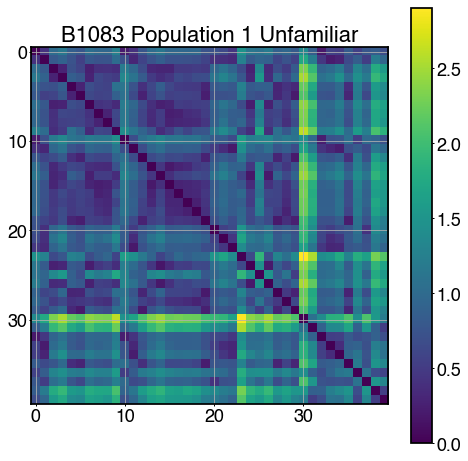

In [57]:
# Left is first four, right is last four
ntrials = 10
nstim = 4
dat = dat + dat.T
dsym = dat+dat.T
plt.figure(figsize=(8,8))
plt.imshow(dat)
plt.xticks(np.arange(0,ntrials*nstim, ntrials))
plt.yticks(np.arange(0,ntrials*nstim, ntrials))
plt.grid(True)
plt.colorbar()
plt.title('B1083 Population 1 Unfamiliar')

In [50]:

ntrials = 20
nstims = 4
nchoice = 2
nsc = 2

e1e2means = np.zeros((nstims, nstims))
for env1 in range(nstims):
    for env2 in range(nstims):
        
        env1env2mean = np.mean(dsym[env1*ntrials:(env1*ntrials + ntrials), env2*ntrials:(env2*ntrials + ntrials)])
        e1e2means[env1, env2] = env1env2mean
        
hole_mat = np.zeros((nchoice, nchoice))
for b1 in range(nchoice):
    for b2 in range(nchoice):
        
        m = np.mean(e1e2means[b1*nsc:(b1*nsc+nsc), b2*nsc:(b2*nsc+nsc)])
        hole_mat[b1, b2] = m

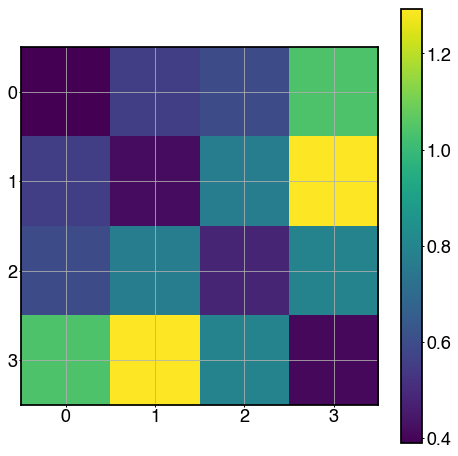

In [51]:
plt.figure(figsize=(8,8))
plt.imshow(e1e2means)
plt.xticks(np.arange(0,4, 1))
plt.yticks(np.arange(0,4, 1))
plt.grid(True)
plt.colorbar()

Text(0.5,1,'B1083 Population 2')

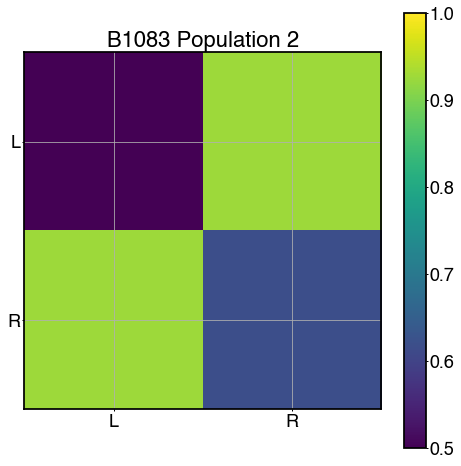

In [53]:
plt.figure(figsize=(8,8))
plt.imshow(hole_mat, vmin=0.5, vmax=1.0)
plt.xticks(np.arange(0,nchoice, 1), ['L', 'R'])
plt.yticks(np.arange(0,nchoice, 1), ['L', 'R'])

plt.grid(True)
plt.colorbar()
plt.title('B1083 Population 2')

In [5]:
datpath = '/home/brad/tmpdata/JSpop_{}-1--1.0-10_LvsR-2-shuffled.pkl'.format(bird)
with open(datpath, 'rb') as f:
    dat = pickle.load(f)

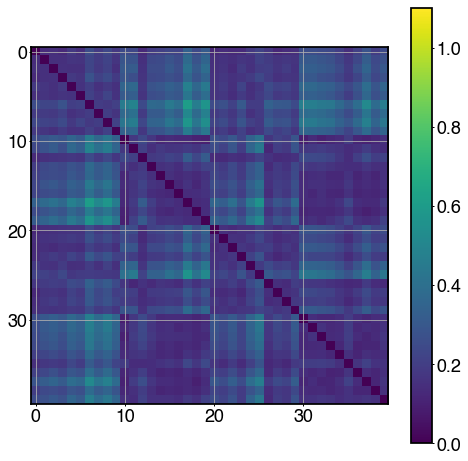

In [6]:
dat = dat + dat.T
plt.figure(figsize=(8,8))
plt.imshow(dat, vmin=0, vmax=1.1)
plt.xticks(np.arange(0,40, 10))
plt.yticks(np.arange(0,40, 10))
plt.grid(True)
plt.colorbar()

In [17]:
dat

array([[0.        , 0.1698532 , 0.13529172, ..., 0.50325423, 0.42823883,
        0.45399145],
       [0.1698532 , 0.        , 0.12230572, ..., 0.44459692, 0.36898285,
        0.39654036],
       [0.13529172, 0.12230572, 0.        , ..., 0.46909066, 0.39155969,
        0.42773306],
       ...,
       [0.50325423, 0.44459692, 0.46909066, ..., 0.        , 0.14933582,
        0.27381942],
       [0.42823883, 0.36898285, 0.39155969, ..., 0.14933582, 0.        ,
        0.20059864],
       [0.45399145, 0.39654036, 0.42773306, ..., 0.27381942, 0.20059864,
        0.        ]])